# Lab 10. Ensemble

**Author:** &nbsp;&nbsp;&nbsp;*Gabriel Szewczyk*</br>
**Date:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*14.05.2024*

## Comaprison of different classificators

modules

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

import data

In [45]:

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names, )
wine_df.info()

wine_df.head(10)
X = wine_df.to_numpy()
y = np.array(wine.target)
X.shape
# 60% of data will be training set, 20% for model validation on different models
# and 20% for proper test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=12345)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, train_size=0.5, random_state=12345)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

function for showing results of classifying

In [46]:
def report(y_val, y_pred, classifier_name):
    print("\n\n*** Classification report ***")
    print(classification_report(y_val, y_pred))
    confmat = confusion_matrix(y_val, y_pred)
    sns.heatmap(confmat, fmt="g", annot=True, cmap="Reds")
    plt.title(f'confusion matrix for {classifier_name}')
    plt.ylabel('Real values', fontweight='bold')
    plt.xlabel('Predicted class affiliation', fontweight='bold')
    plt.show()

The process of cross-validation with five splits

In [52]:
def cross_validation(model, X, y):
    print("\n\n*** Cross-validation report ***")
    stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
    score = cross_val_score(model, X, y, cv=stratified_k_fold)
    print(f"Cross-validation scores: {score}")
    mean = round(score.mean(), 5)
    print(f"Scores mean: {mean}")
    return mean

### Decision tree classifier



*** Classification report ***
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       1.00      0.59      0.74        27
           2       0.00      0.00      0.00         0

    accuracy                           0.69        36
   macro avg       0.53      0.53      0.50        36
weighted avg       0.90      0.69      0.75        36



c:\Users\gabso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

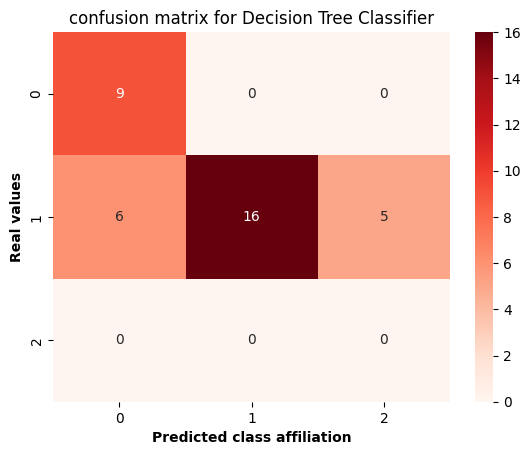



*** Cross-validation report ***
Cross-validation scores: [0.66666667 0.55555556 0.72222222 0.54285714 0.68571429]
Scores mean: 0.6346


0.6346

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_leaf=3, random_state=12345, max_depth=1)

dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_val)

report(y_pred, y_val, "Decision Tree Classifier")
cross_validation(dtc, X, y)

### Bagging classifier



*** Classification report ***
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       0.94      0.68      0.79        22
           2       0.60      0.75      0.67         4

    accuracy                           0.78        36
   macro avg       0.73      0.81      0.75        36
weighted avg       0.82      0.78      0.78        36



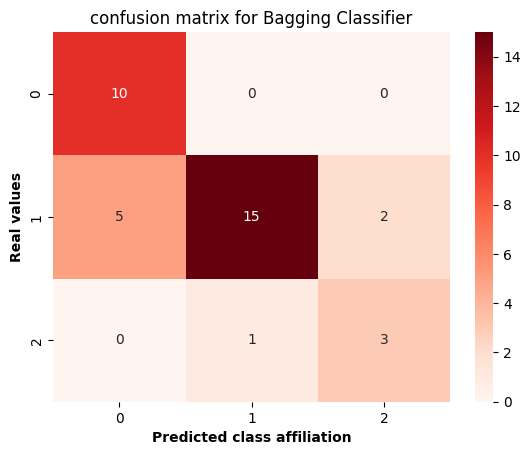



*** Cross-validation report ***
Cross-validation scores: [0.75       0.80555556 0.88888889 0.77142857 0.85714286]
Scores mean: 0.8146


In [49]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(dtc, n_estimators=50, random_state=12345)
bc.fit(x_train, y_train)
y_pred = bc.predict(x_val)

report(y_pred, y_val, "Bagging Classifier")
cross_validation(bc, X, y)

### AdaBoost classifier



*** Classification report ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.80      0.67      0.73         6

    accuracy                           0.92        36
   macro avg       0.89      0.87      0.88        36
weighted avg       0.91      0.92      0.91        36



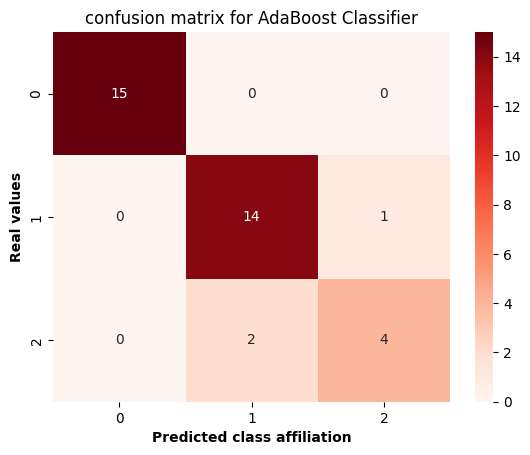



*** Cross-validation report ***
Cross-validation scores: [0.91666667 0.97222222 0.97222222 0.97142857 0.94285714]
Scores mean: 0.95508


In [50]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dtc, algorithm='SAMME', n_estimators=50, random_state=12345)
abc.fit(x_train, y_train)
y_pred = abc.predict(x_val)
report(y_pred, y_val, "AdaBoost Classifier")
cross_validation(abc, X, y)

### Gradient Boosting Classifier



*** Classification report ***
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00         5

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



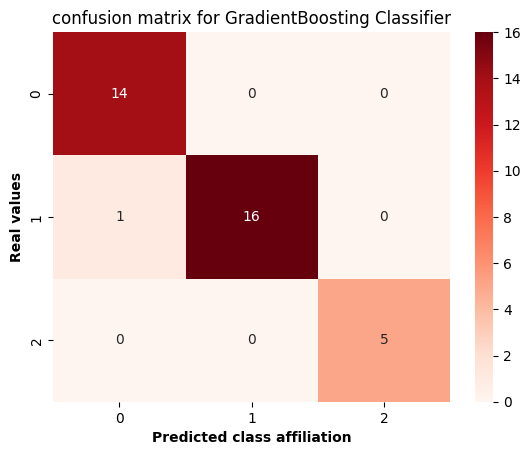



*** Cross-validation report ***
Cross-validation scores: [0.94444444 0.97222222 0.97222222 0.91428571 0.97142857]
Scores mean: 0.95492


0.95492

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier( learning_rate=1.0, subsample=0.5, n_estimators=50, random_state=12345)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
report(y_pred, y_val, "GradientBoosting Classifier")
cross_validation(gbc, X, y)

### Summary

*Summarizing all types of ensemble classifiers, the classifier enhanced by AdaBoostClassifier proved to be the most effective. It had a cross-validation score of 0.9558. Very close to it was the score of GradientBoostingClassifier, at 0.9542. The basic decision tree yielded only a 0.6346 result, while the Bagging classifier scored 0.8146, which is still much better than the basic algorithm. It should also be noted that each classifier was based on the original decision tree with a maximum depth of 1 and a minimum samples leaf of 3, which could have affected the quality of classifiers based on it. Comparing boosting-type algorithms, both seem to provide favorable results, deviating from the bagging algorithm and the basic tree.*

**How chosen classificator will tackle with eventual "real" data?**

AdaBoost classifier on test data



*** Classification report ***
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.85      0.92      0.88        12
           2       0.92      0.92      0.92        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



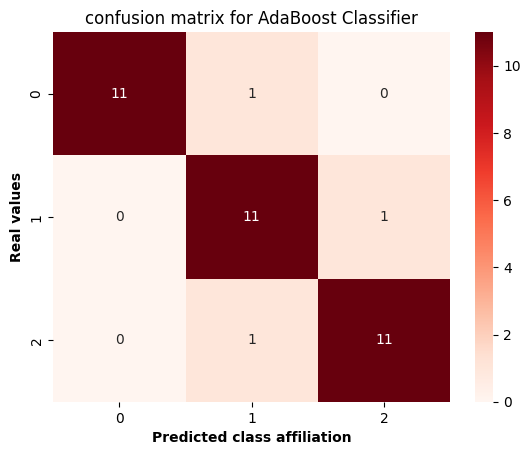

In [58]:
abc.fit(x_train, y_train)
y_pred = abc.predict(x_test)
report(y_pred, y_test, "AdaBoost Classifier")

GradientBoosting classifier on test data



*** Classification report ***
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00         5

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



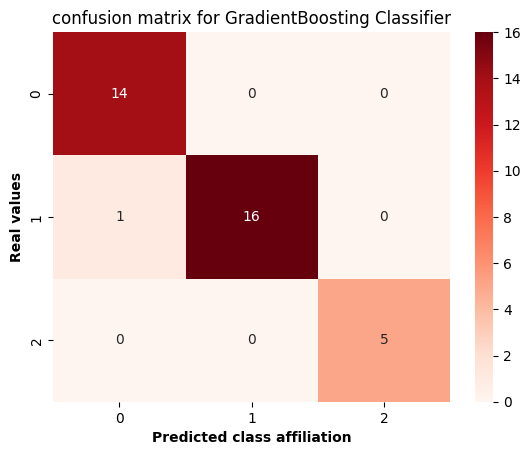

In [60]:
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
report(y_pred, y_val, "GradientBoosting Classifier")

*Looking on the results algorithms giving on test data turns out that choice between this two best options depends eventually just on data given. As one can see on heatmaps, in this case GradientBoosting classifier fared slightly better.*